In [4]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

from EDA_script_original import *
label_mapping = {-1: 0, 1: 1, 2: 2, 3: 3, 4: 4}
df_y = df_y.replace(label_mapping)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(df_train, df_y, test_size=0.3, random_state=42)

# Define a range of values for the hyperparameters to search through
param_grid = {
    'device' : ['cuda'],
    'objective': 'multiclass',
    'num_class': 5,
    'metric': 'multi_logloss',
    'verbose': 2,
    'num_leaves': 20,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'min_data_in_leaf':4,
}
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.864789
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.197679
[LightGBM] [Debug] init for col-wise cost 0.003709 seconds, init for row-wise cost 0.013126 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016516 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3967
[LightGBM] [Info] Number of data points in the train set: 33600, number of used features: 317
[LightGBM] [Info] Start training from score -4.282397
[LightGBM] [Info] Start training from score -1.579677
[LightGBM] [Info] Start training from score -1.216351
[LightGBM] [Info] Start training from score -1.261657
[LightGBM] [Info] Start training from score -1.606169
[LightGBM] [Debug] Re-bagging, using 26951 data to train
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 20 and dep

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

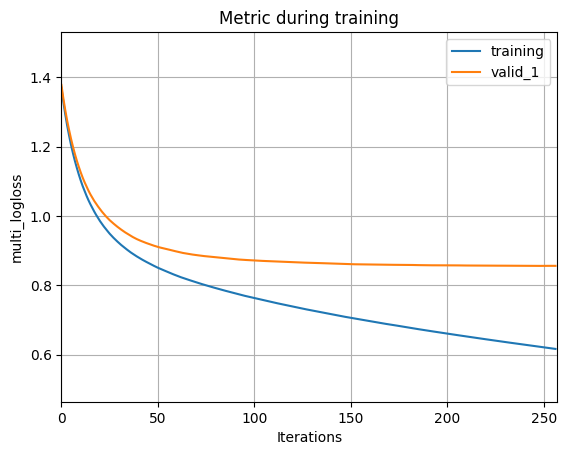

In [21]:
evals_result = {} 
# Training the Model
num_round = 1000
model = lgb.train(params,
                  train_data,
                  num_round,
                  early_stopping_rounds=10,
                  valid_sets=[train_data,valid_data],
                  evals_result=evals_result)


y_pred = model.predict(X_val,
                       num_iteration=model.best_iteration)

accuracy = log_loss(y_val, y_pred)
lgb.plot_metric(evals_result, metric='multi_logloss')

In [22]:
y_pred_1 = model.predict(df_test,
                       num_iteration=model.best_iteration)
class_order = [0, 1, 2, 3, 4]
class_mapping = {class_label: f"Class{class_label}" for class_label in class_order}

submission_df = pd.DataFrame(y_pred_1, columns=class_mapping.values())
submission_df.columns = ['no answer', 'very important', 'quite important', 'not important', 'not at all important']
submission_df.insert(0, 'id', df_test.index)

# Save the submission file
submission_file = ('eda_script_og_amy_submission2.csv')
submission_df.to_csv(submission_file, index=False)